1. Handling Missing Data in Titanic Dataset
   - Task:Identify and handle missing values in the Titanic dataset. Experiment with different strategies
   - such as mean/median imputation, mode imputation, and dropping rows/columns.
   - Dataset: Titanic Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df=pd.read_csv("titanic .csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
print("Missing values in rows:")
df.isnull().sum()

Missing values in rows:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# impute age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
# Impute  Embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
# Drop the Cabin column
df.drop(columns=['Cabin'], inplace=True)

In [ ]:
df.shape

(891, 11)

2. Encoding Categorical Variables in a Car Evaluation Dataset
   - Task: Encode categorical variables in the Car Evaluation dataset using one-hot encoding and label encoding.
   -  Compare the results.
   - Dataset: Car Evaluation Dataset


In [ ]:
from sklearn.preprocessing import LabelEncoder
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_evaluation = pd.read_csv(url, names=column_names)
car_evaluation.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
car_evaluation.shape

(1728, 7)

In [ ]:
car_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
#  Label Encoding
label_encoders = {}
df_label_encoded = car_evaluation.copy()
for column in car_evaluation.columns:
    label_encoders[column] = LabelEncoder()
    df_label_encoded[column] = label_encoders[column].fit_transform(car_evaluation[column])


In [ ]:
# One-Hot Encoding
df_one_hot_encoded = pd.get_dummies(car_evaluation, drop_first=True)

In [ ]:
# Compare the results
print("\nLabel Encoded DataFrame:")
print(df_label_encoded.head())

print("\nOne-Hot Encoded DataFrame:")
print(df_one_hot_encoded.head())

print("\nShape of the original DataFrame:", car_evaluation.shape)
print("Shape of the Label Encoded DataFrame:", df_label_encoded.shape)
print("Shape of the One-Hot Encoded DataFrame:", df_one_hot_encoded.shape)


Label Encoded DataFrame:
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2

One-Hot Encoded DataFrame:
   buying_low  buying_med  buying_vhigh  maint_low  maint_med  maint_vhigh  \
0       False       False          True      False      False         True   
1       False       False          True      False      False         True   
2       False       False          True      False      False         True   
3       False       False          True      False      False         True   
4       False       False          True      False      False         True   

   doors_3  doors_4  doors_5more  persons_4  persons_more  lug_boot_med  \
0    False    False        False      False         Fa

3. Scaling Features in the Wine Quality Dataset
   - Task: Apply normalization and standardization to the features in the Wine Quality dataset. Analyze how scaling
   - affects the distribution of data.
   - Dataset: Wine Quality Dataset

In [ ]:
wine_quality = pd.read_csv('winequality-red.csv')

In [ ]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_quality.shape

(1599, 12)

In [ ]:
print("Dataset Info:")
print(wine_quality.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [ ]:
X=wine_quality.drop(columns=['quality'])
y=wine_quality['quality']

In [ ]:
# Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
df_standardized = pd.DataFrame(X_standardized, columns=X.columns)

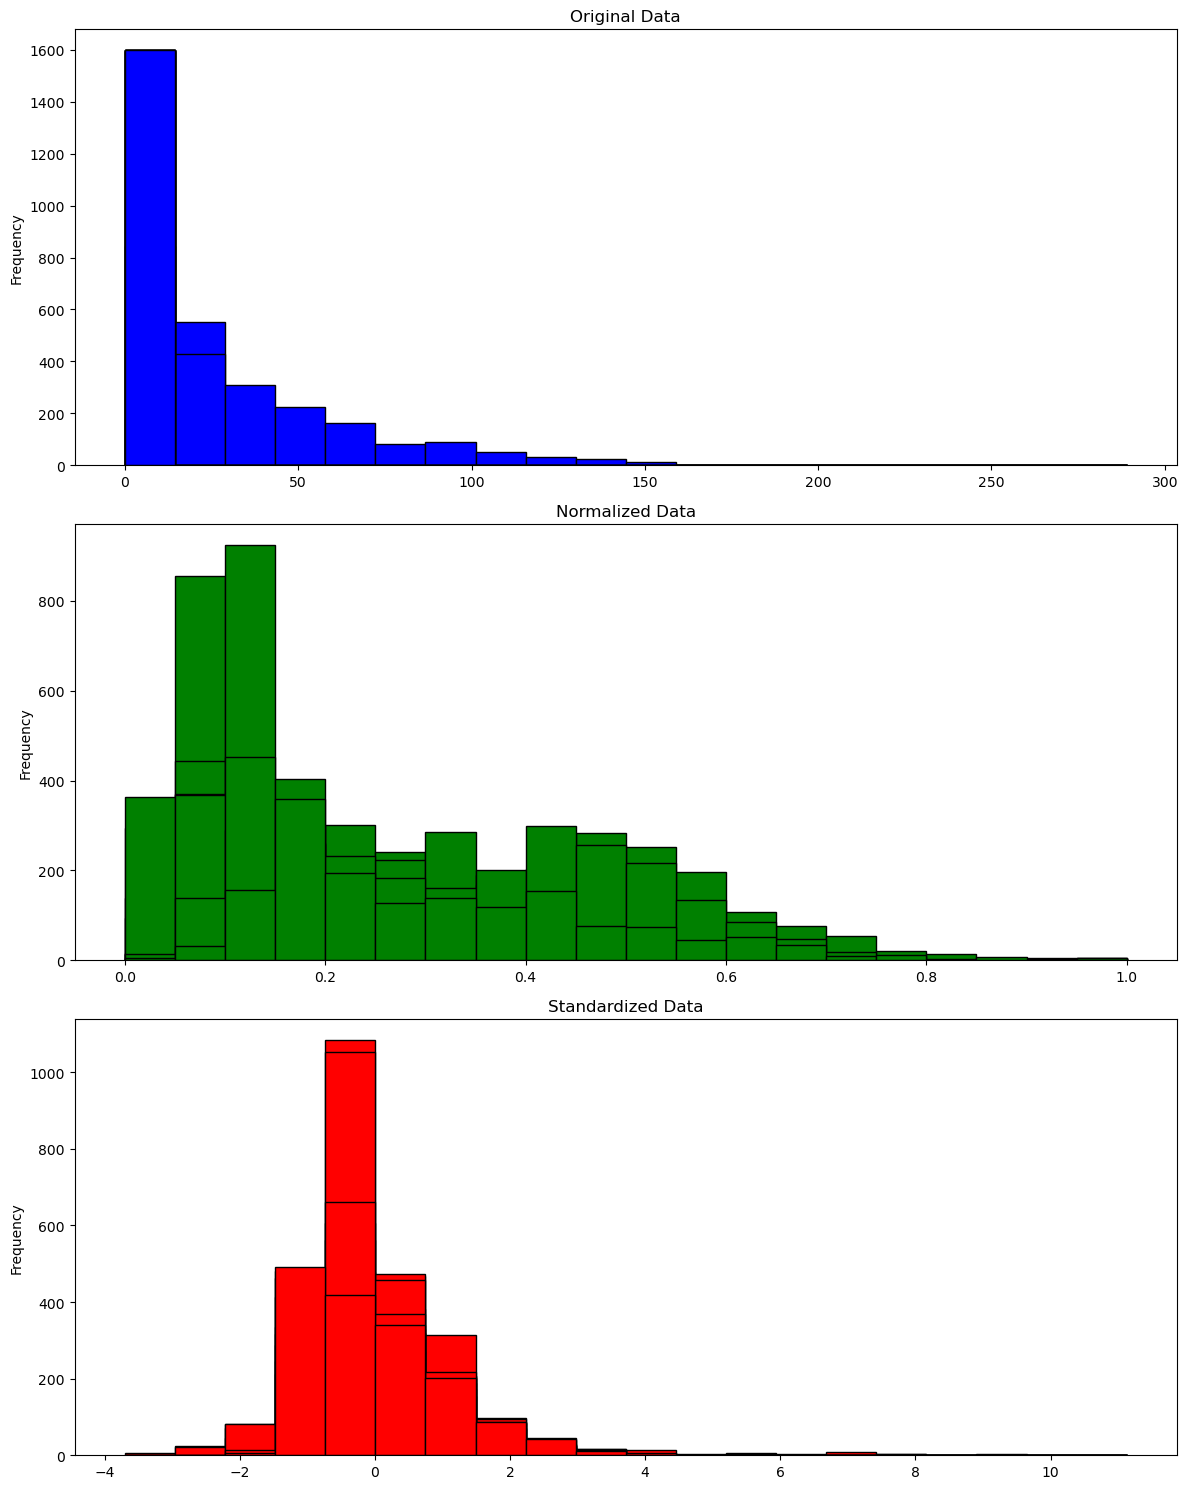

In [ ]:
import matplotlib.pyplot as plt

def plot_histograms(dataframes, titles, colors, bins=20):
    fig, axes = plt.subplots(nrows=len(dataframes), ncols=1, figsize=(12, 15))
    for i, (df, title, color) in enumerate(zip(dataframes, titles, colors)):
        # Plot histogram for each dataframe
        df.plot.hist(ax=axes[i], bins=bins, color=color, edgecolor='black', grid=False, legend=False)
        axes[i].set_title(title)
    plt.tight_layout()
    plt.show()

# Plot histograms for original, normalized, and standardized data
plot_histograms(
    dataframes=[wine_quality, df_normalized, df_standardized],
    titles=['Original Data', 'Normalized Data', 'Standardized Data'],
    colors=['blue', 'green', 'red']
)


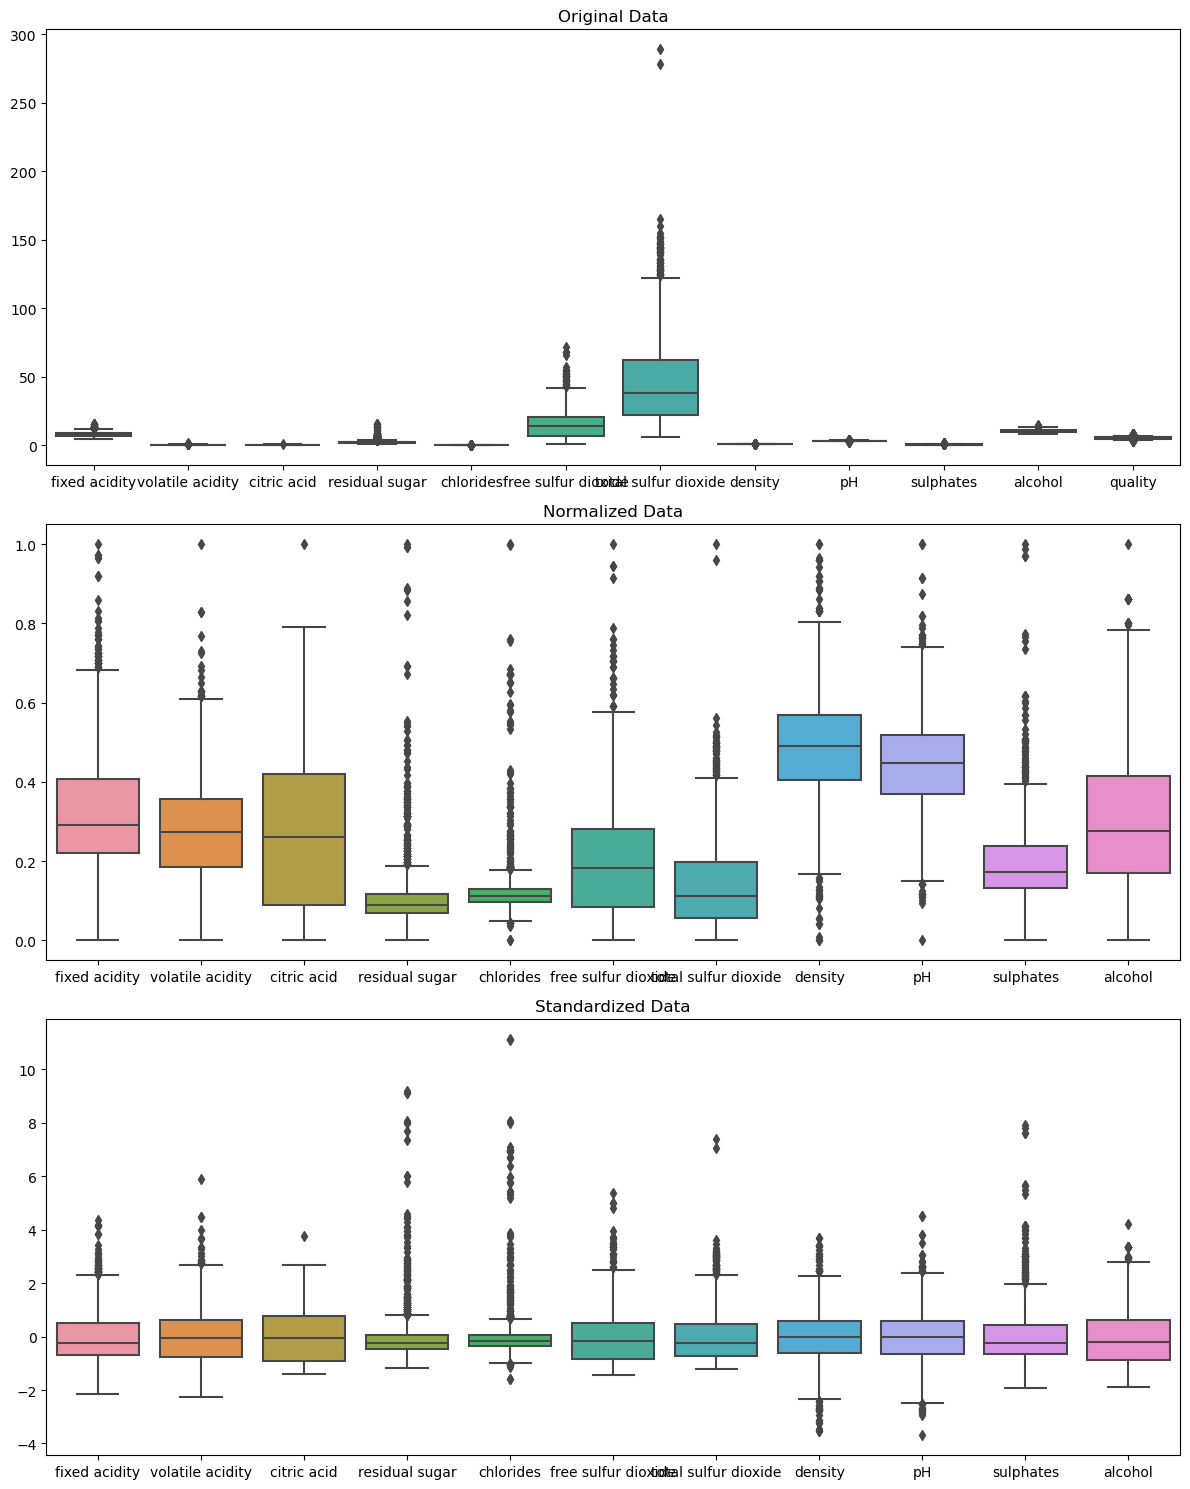

In [ ]:
import seaborn as sns

def plot_boxplots(dataframes, titles):
    fig, axes = plt.subplots(nrows=len(dataframes), ncols=1, figsize=(12, 15))
    for i, (df, title) in enumerate(zip(dataframes, titles)):
        # Plot boxplot for each dataframe
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(title)
    plt.tight_layout()
    plt.show()

# Plot boxplots for original, normalized, and standardized data
plot_boxplots(
    dataframes=[wine_quality, df_normalized, df_standardized],
    titles=['Original Data', 'Normalized Data', 'Standardized Data']
)

4. Handling Outliers in the Boston Housing Dataset
   - Task: Identify and handle outliers in the Boston Housing dataset using techniques like Z-score, IQR, and visualization methods.
   - Dataset: Boston Housing Dataset


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
boston_housing=pd.read_csv("BostonHousing.csv")

In [ ]:
boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
boston_housing.shape

(506, 14)

In [ ]:
boston_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# Calculate Z-scores
z_scores = np.abs(zscore(boston_housing))
outliers_z = (z_scores > 3)

# Get the indices of outliers
outliers_z_indices = np.where(outliers_z.any(axis=1))[0]
print("\nNumber of outliers detected using Z-score:", len(outliers_z_indices))


Number of outliers detected using Z-score: 85


In [ ]:
# Calculate IQR
Q1 = boston_housing.quantile(0.25)
Q3 = boston_housing.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = ((boston_housing < (Q1 - 1.5 * IQR)) | (boston_housing > (Q3 + 1.5 * IQR)))
outliers_iqr_indices = np.where(outliers_iqr.any(axis=1))[0]
print("\nNumber of outliers detected using IQR:", len(outliers_iqr_indices))


Number of outliers detected using IQR: 238


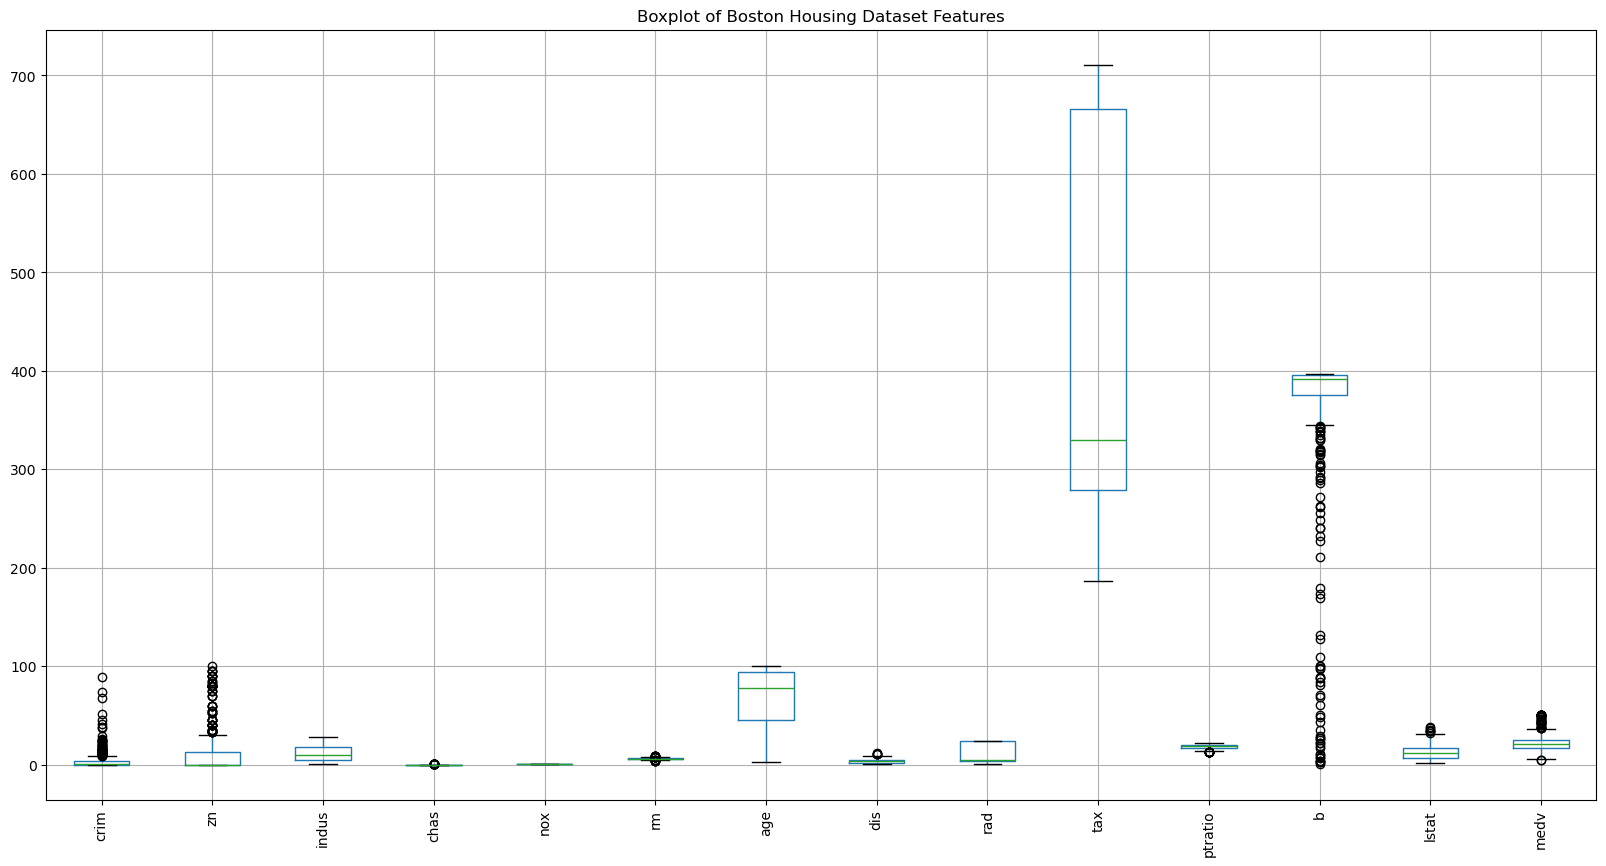

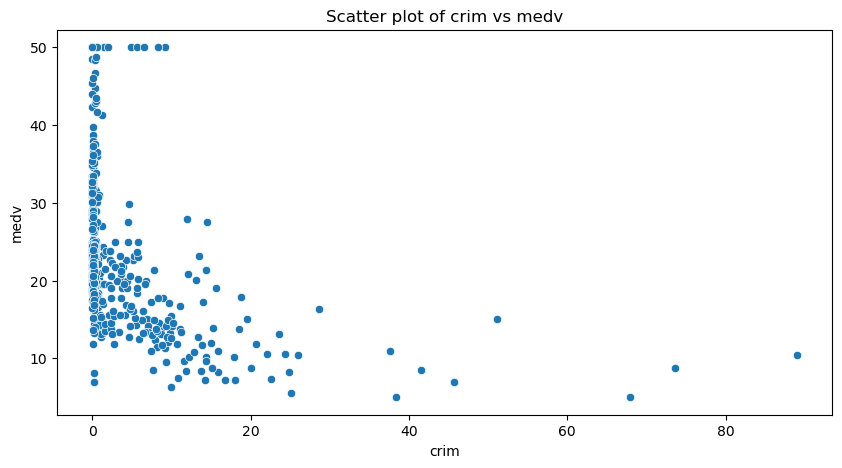

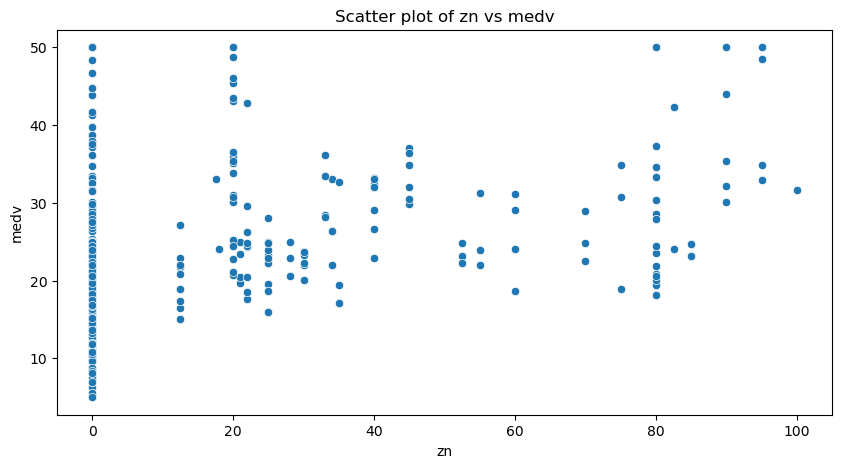

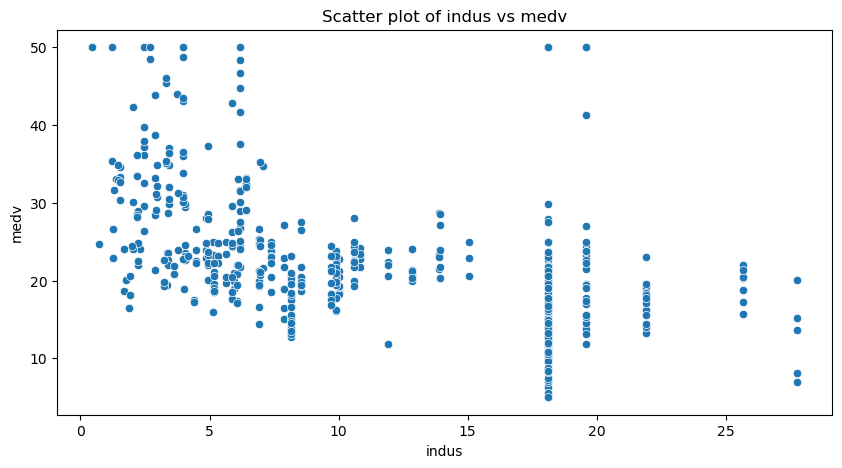

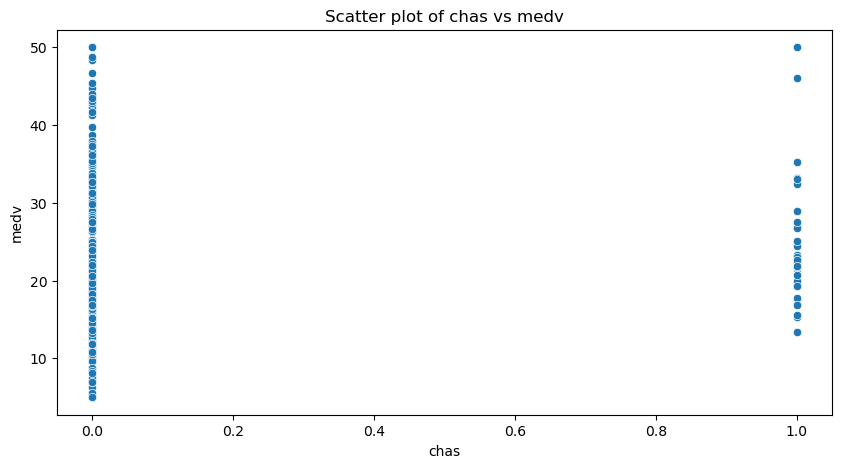

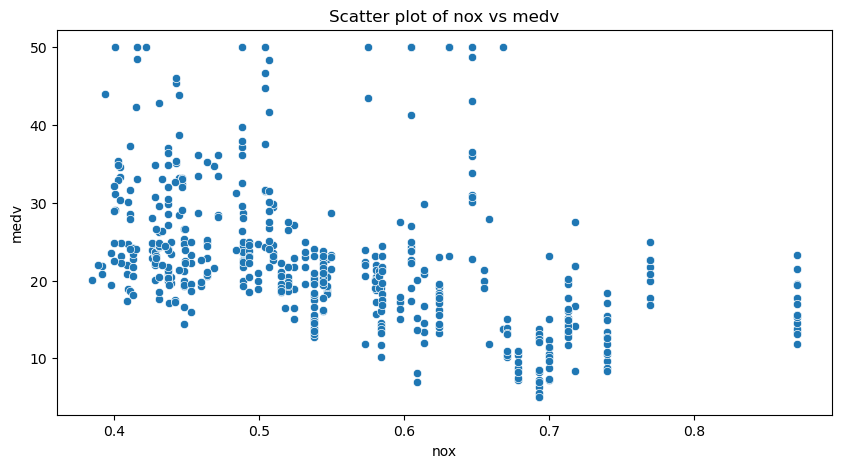

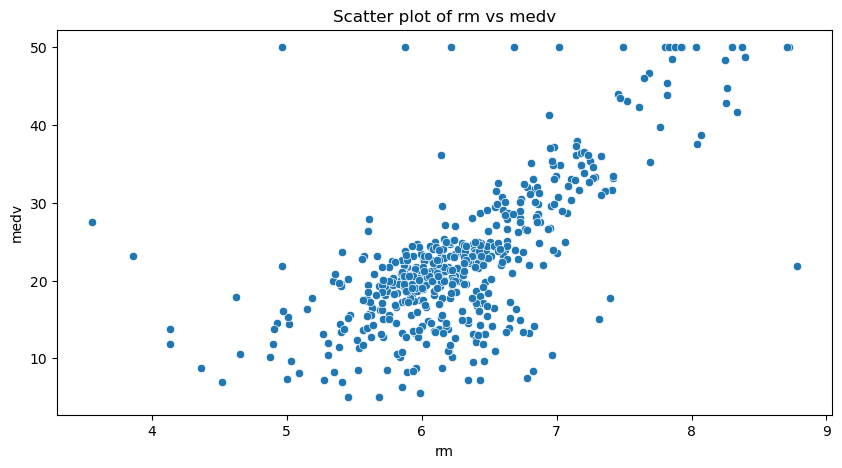

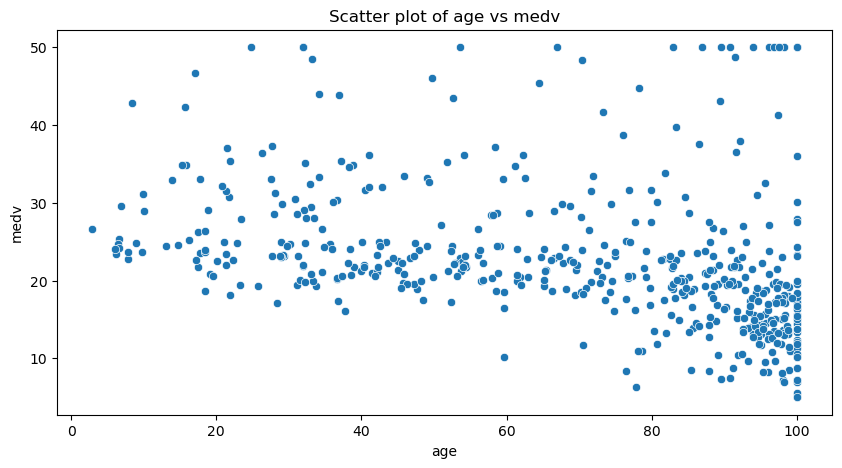

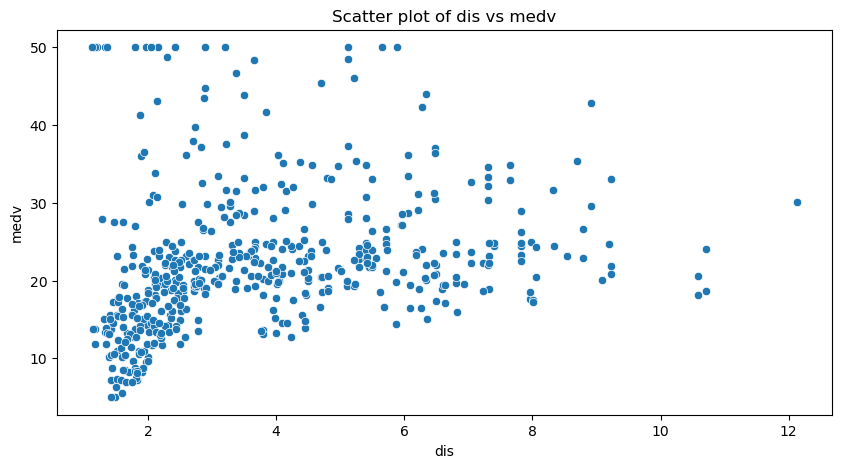

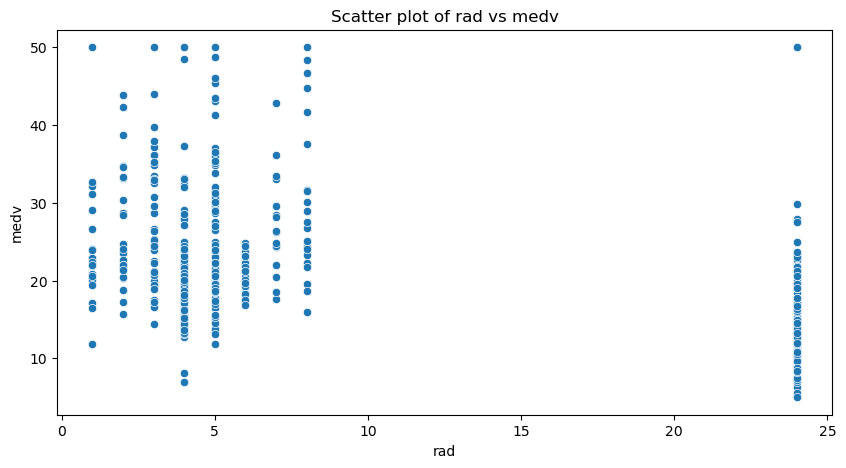

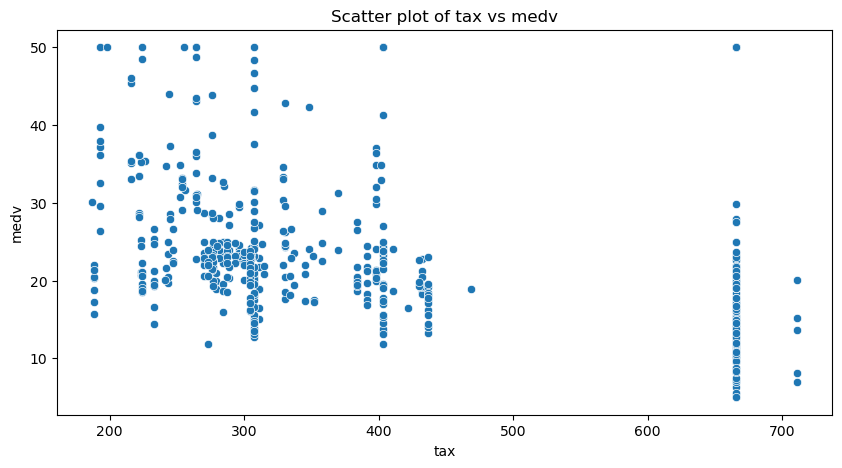

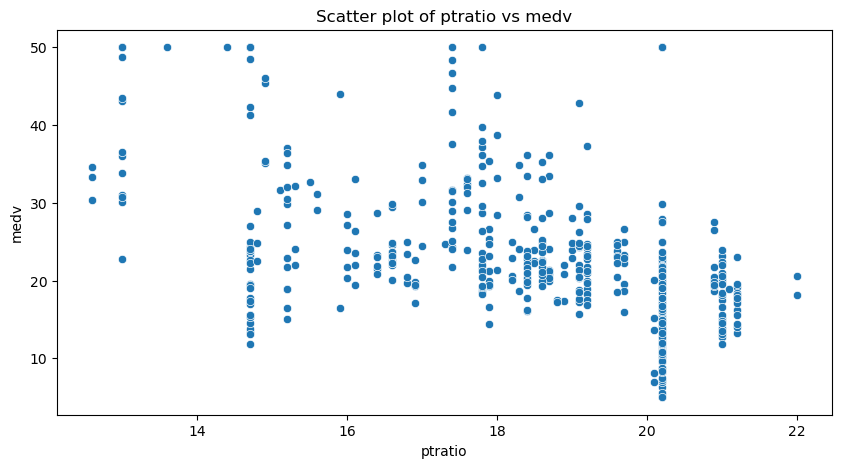

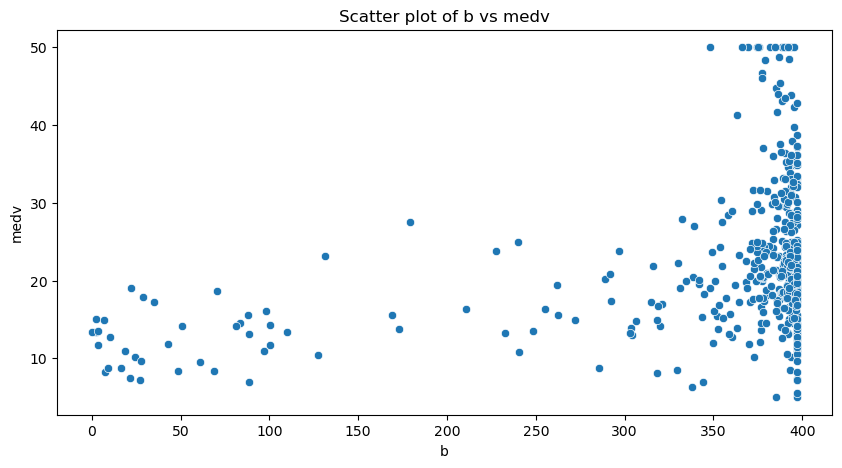

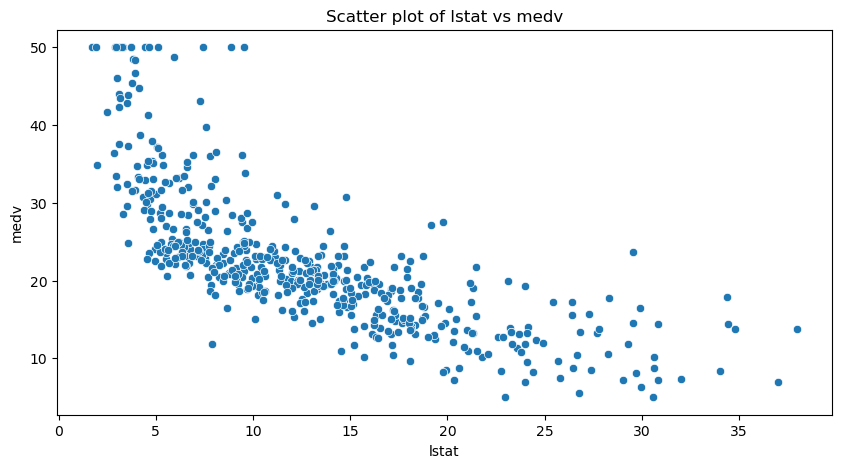

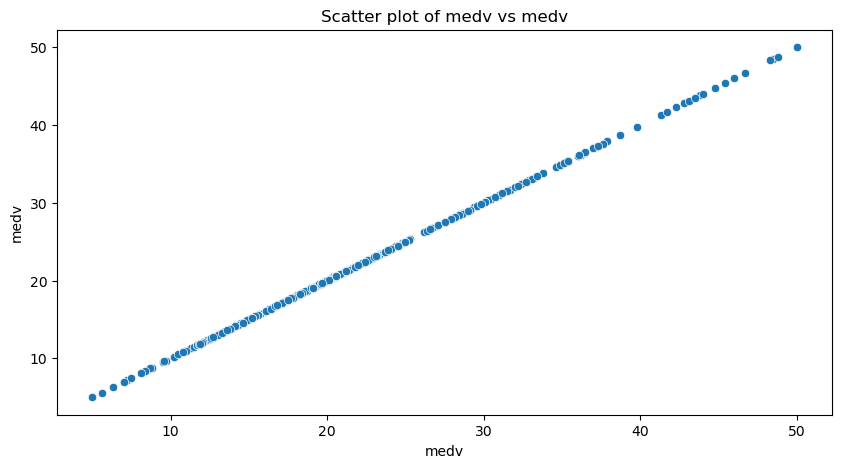

In [ ]:
# Boxplots
plt.figure(figsize=(20, 10))
boston_housing.boxplot()
plt.title("Boxplot of Boston Housing Dataset Features")
plt.xticks(rotation=90)
plt.show()

# Scatter plots
for column in boston_housing.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=boston_housing, x=column, y='medv')
    plt.title(f'Scatter plot of {column} vs medv')
    plt.show()

In [ ]:
# Remove outliers using Z-score
boston_housing_no_outliers_z = boston_housing.drop(outliers_z_indices)
print("\nShape of dataset after removing outliers using Z-score:", boston_housing_no_outliers_z.shape)

# Remove outliers using IQR
boston_housing_no_outliers_iqr = boston_housing[~outliers_iqr.any(axis=1)]
print("Shape of dataset after removing outliers using IQR:", boston_housing_no_outliers_iqr.shape)


Shape of dataset after removing outliers using Z-score: (421, 14)
Shape of dataset after removing outliers using IQR: (268, 14)


5. Data Imputation in the Retail Sales Dataset
   - Task: Handle missing values in the Retail Sales dataset using advanced imputation techniques like KNN imputation and MICE.
   - Dataset: Retail Sales Dataset

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

retail_sales=pd.read_csv("retail_sales_dataset.csv")
retail_sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3.0,50.0,150.0
1,2,2/27/2023,CUST002,Female,26,Clothing,2.0,500.0,1000.0
2,3,1/13/2023,CUST003,Male,50,Electronics,1.0,30.0,30.0
3,4,5/21/2023,CUST004,Male,37,Clothing,1.0,500.0,500.0
4,5,5/6/2023,CUST005,Male,30,Beauty,2.0,50.0,100.0


In [ ]:
retail_sales.shape

(1000, 9)

In [ ]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1000 non-null   int64  
 1   Date              1000 non-null   object 
 2   Customer ID       1000 non-null   object 
 3   Gender            1000 non-null   object 
 4   Age               1000 non-null   int64  
 5   Product Category  1000 non-null   object 
 6   Quantity          988 non-null    float64
 7   Price per Unit    988 non-null    float64
 8   Total Amount      992 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 70.4+ KB


In [ ]:
# Identify missing values
missing_values = retail_sales.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Transaction ID       0
Date                 0
Customer ID          0
Gender               0
Age                  0
Product Category     0
Quantity            12
Price per Unit      12
Total Amount         8
dtype: int64


In [ ]:
# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
# Impute only the numerical columns
retail_sales_knn_imputed = retail_sales.copy()
numerical_columns = retail_sales.select_dtypes(include=[np.number]).columns
retail_sales_knn_imputed[numerical_columns] = knn_imputer.fit_transform(retail_sales[numerical_columns])

print("\nMissing Values After KNN Imputation:")
print(retail_sales_knn_imputed.isnull().sum())



Missing Values After KNN Imputation:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
# Apply MICE imputation
mice_imputer = IterativeImputer(max_iter=10, random_state=0)
retail_sales_mice_imputed = retail_sales.copy()
retail_sales_mice_imputed[numerical_columns] = mice_imputer.fit_transform(retail_sales[numerical_columns])

print("\nMissing Values After MICE Imputation:")
print(retail_sales_mice_imputed.isnull().sum())



Missing Values After MICE Imputation:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


6. Feature Engineering in the Heart Disease Dataset
   - Task: Create new features from existing ones in the Heart Disease dataset, such as age groups, cholesterol levels, and more.
   - Dataset: Heart Disease Dataset

In [ ]:
heart_disease=pd.read_csv("heart_disease_data.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_disease.shape

(303, 14)

In [ ]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Inspect the range of 'age' and 'chol' and 'thalach'
max_age = heart_disease['age'].max()
min_age = heart_disease['age'].min()
max_chol = heart_disease['chol'].max()
min_chol = heart_disease['chol'].min()
min_thalach = heart_disease['thalach'].min()
max_thalach = heart_disease['thalach'].max()

print(f"Age range: {min_age} - {max_age}")
print(f"Cholesterol range: {min_chol} - {max_chol}")
print(f"Heart rate (thalach) range: min = {min_thalach}, max = {max_thalach}")

Age range: 29 - 77
Cholesterol range: 126 - 564
Heart rate (thalach) range: min = 71, max = 202


In [ ]:
# Define bins and labels
age_bins = [29, 45, 60, 77]
age_labels = ['Young', 'Middle-aged', 'Senior']
heart_disease['age_group'] = pd.cut(heart_disease['age'], bins=age_bins, labels=age_labels)


chol_bins = [126, 200, 239, 564]
chol_labels = ['Normal', 'Borderline High', 'High']
heart_disease['chol_level'] = pd.cut(heart_disease['chol'], bins=chol_bins, labels=chol_labels)


thalach_bins = [70, 114, 158, 202]
thalach_labels = ['Low', 'Normal', 'High']

heart_disease['thalach_category'] = pd.cut(heart_disease['thalach'], bins=thalach_bins, labels=thalach_labels)

# Inspect the new features
print("\nDataset with New Features:")
print(heart_disease.head())



Dataset with New Features:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target    age_group       chol_level thalach_category  
0   0     1       1       Senior  Borderline High           Normal  
1   0     2       1        Young             High             High  
2   0     2       1        Young  Borderline High             High  
3   0     2       1  Middle-aged  Borderline High             High  
4   0     2       1  Middle-aged             High             High  


7. Transforming Variables in the Bike Sharing Dataset
   - Task: Apply transformations like log, square root, and Box-Cox transformations to skewed variables in the Bike Sharing dataset.
   - Dataset: Bike Sharing Dataset

In [ ]:
from scipy.stats import skew, boxcox
bike_sharing=pd.read_csv("hour.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
bike_sharing.shape

(17379, 17)

In [ ]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Identify numeric columns
numeric_columns = bike_sharing.select_dtypes(include=[np.number]).columns

# Identify non-numeric columns
non_numeric_columns = bike_sharing.columns.difference(numeric_columns)
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['dteday'], dtype='object')


In [ ]:
# Exclude non-numeric columns
numeric_columns = bike_sharing.select_dtypes(include=[np.number]).columns

# Calculate skewness for numeric columns
skewness = bike_sharing[numeric_columns].apply(lambda x: skew(x.dropna()))
print("Skewness of variables:\n", skewness)

Skewness of variables:
 instant       0.000000
season       -0.005415
yr           -0.010242
mnth         -0.009252
hr           -0.010679
holiday       5.638051
weekday      -0.002998
workingday   -0.785190
weathersit    1.227941
temp         -0.006020
atemp        -0.090421
hum          -0.111278
windspeed     0.574856
casual        2.499021
registered    1.557770
cnt           1.277301
dtype: float64


In [ ]:
skewed_features = skewness[abs(skewness) > 0.5].index
print("Skewed variables:", skewed_features)

Skewed variables: Index(['holiday', 'workingday', 'weathersit', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


In [ ]:
# Apply transformations
df_transformed = bike_sharing.copy()

# Log transformation
for feature in skewed_features:
    if bike_sharing[feature].min() > 0:  # log transform only positive values
        df_transformed[feature + '_log'] = np.log(bike_sharing[feature] + 1)

# Square root transformation
for feature in skewed_features:
    df_transformed[feature + '_sqrt'] = np.sqrt(bike_sharing[feature])

# Box-Cox transformation
for feature in skewed_features:
    if bike_sharing[feature].min() > 0:  # Box-Cox requires positive values
        df_transformed[feature + '_boxcox'], _ = boxcox(bike_sharing[feature] + 1)

# Display transformed features
print(df_transformed.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  ...   cnt_log  holiday_sqrt  workingday_sqrt  weathersit_sqrt  \
0           1  ...  2.833213           0.0              0.0              1.0   
1           1  ...  3.713572           0.0              0.0              1.0   
2           1  ...  3.496508           0.0              0.0              1.0   
3           1  ...  2.639057           0.0              0.0              1.0   
4           1  ...  0.693147           0.0              0.0              1.0   

   windspeed_sqrt  casual_sqrt  registered_sqrt  c

8. Feature Selection in the Diabetes Dataset
   - Task: Use techniques like correlation analysis, mutual information, and recursive feature elimination (RFE) to select important features in the Diabetes dataset.
   - Dataset: Diabetes Dataset

In [4]:
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
diabetes_data=pd.read_csv("diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_data.shape

(768, 9)

In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Check for any missing values
print("Checking for missing values:")
diabetes_data.isnull().sum()

Checking for missing values:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Check for duplicate rows
duplicate_rows = diabetes_data[diabetes_data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [9]:
# Feature and target variable
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

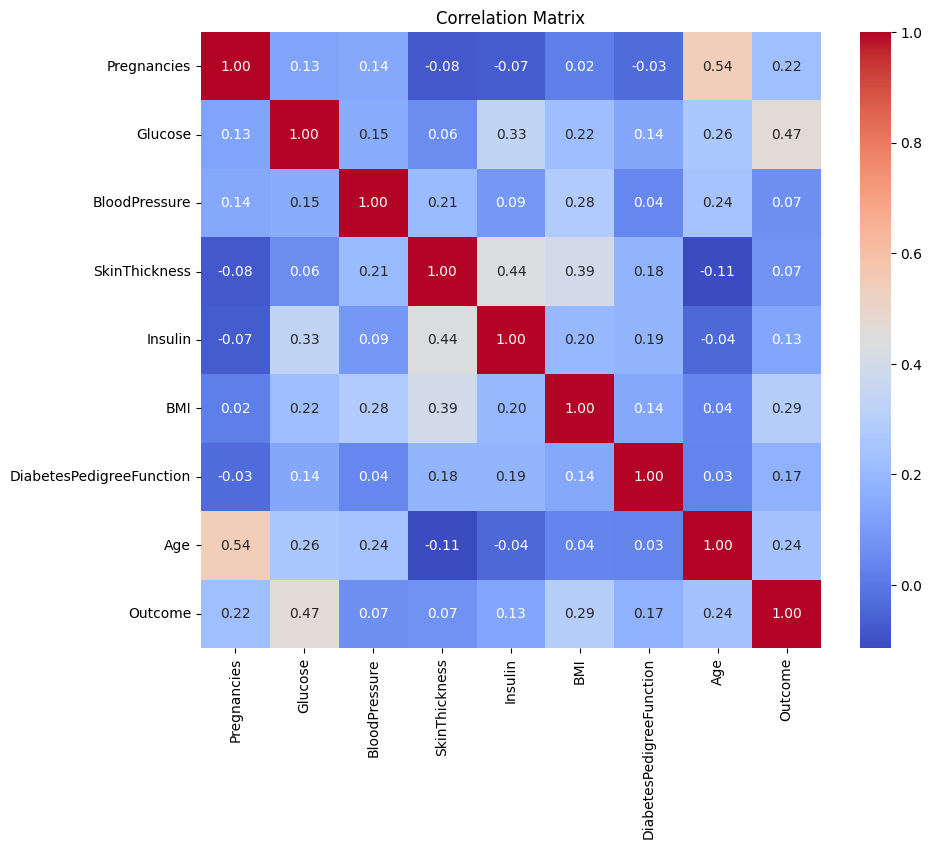

Correlation with Outcome:
 Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [10]:
correlation_matrix = diabetes_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
# Get correlation with target variable
correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=False)
print("Correlation with Outcome:\n", correlation_with_target)


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Feature and target variable
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Calculate mutual information
mi = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print("\nMutual Information:\n", mi_df)



Mutual Information:
                     Feature  Mutual Information
1                   Glucose            0.109195
5                       BMI            0.076284
7                       Age            0.060395
0               Pregnancies            0.048870
3             SkinThickness            0.044168
4                   Insulin            0.029579
6  DiabetesPedigreeFunction            0.017122
2             BloodPressure            0.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Model and RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
rfe_df = pd.DataFrame({'Feature': X.columns, 'RFE Ranking': rfe.ranking_})
rfe_df = rfe_df.sort_values(by='RFE Ranking')
print("\nRFE Ranking:\n", rfe_df)



RFE Ranking:
                     Feature  RFE Ranking
0               Pregnancies            1
1                   Glucose            1
5                       BMI            1
6  DiabetesPedigreeFunction            1
7                       Age            1
2             BloodPressure            2
4                   Insulin            3
3             SkinThickness            4


9. Dealing with Imbalanced Data in the Credit Card Fraud Detection Dataset
   - Task: Handle imbalanced data in the Credit Card Fraud Detection dataset using techniques like SMOTE, ADASYN, and undersampling.
   - Dataset: Credit Card Fraud Detection Dataset


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
credit_data=pd.read_csv("creditcard.csv")
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_data.shape

(284807, 31)

In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


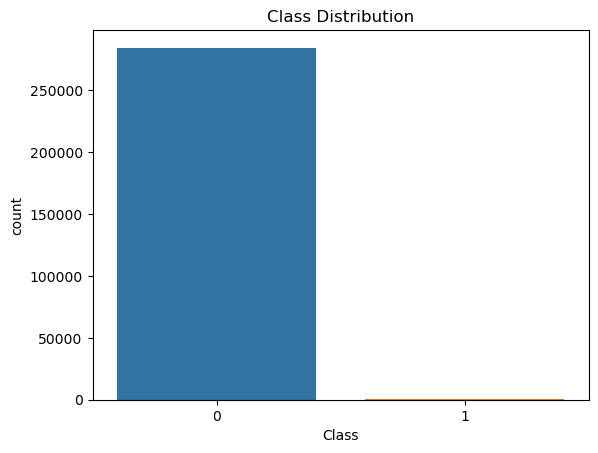

In [ ]:
class_counts = credit_data['Class'].value_counts()
print("Class distribution:\n", class_counts)

# Plotting the class distribution
sns.countplot(x='Class', data=credit_data)
plt.title('Class Distribution')
plt.show()

In [ ]:
X = credit_data.drop('Class', axis=1)
y = credit_data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)
print("SMOTE Resampled dataset shape:", Counter(y_resampled_smote))

SMOTE Resampled dataset shape: Counter({1: 350, 0: 350})


In [ ]:
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)
print("ADASYN Resampled dataset shape:", Counter(y_resampled_adasyn))

ADASYN Resampled dataset shape: Counter({0: 350, 1: 332})


In [ ]:
undersample = RandomUnderSampler(random_state=42)
X_resampled_undersample, y_resampled_undersample = undersample.fit_resample(X_train, y_train)
print("Random Undersampled dataset shape:", Counter(y_resampled_undersample))

Random Undersampled dataset shape: Counter({0: 187, 1: 187})


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Evaluate model on original data
print("Original Data Evaluation:")
evaluate_model(X_train, y_train, X_test, y_test)

# Evaluate model on SMOTE resampled data
print("SMOTE Resampled Data Evaluation:")
evaluate_model(X_resampled_smote, y_resampled_smote, X_test, y_test)

# Evaluate model on ADASYN resampled data
print("ADASYN Resampled Data Evaluation:")
evaluate_model(X_resampled_adasyn, y_resampled_adasyn, X_test, y_test)

# Evaluate model on undersampled data
print("Undersampled Data Evaluation:")
evaluate_model(X_resampled_undersample, y_resampled_undersample, X_test, y_test)

Original Data Evaluation:
[[129  21]
 [ 39  42]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

SMOTE Resampled Data Evaluation:
[[118  32]
 [ 25  56]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       150
           1       0.64      0.69      0.66        81

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.75      0.76       231

ADASYN Resampled Data Evaluation:
[[117  33]
 [ 23  58]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       150
           1       0.64      0.72      0.67        81

    accuracy        

10. Combining Multiple Datasets in the Movie Lens Dataset
    - Task: Combine and preprocess multiple related datasets from the Movie Lens dataset, such as ratings, user
    - information, and movie metadata.
    - Dataset: Movie Lens Dataset

In [ ]:
# Load datasets
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')

In [ ]:
print("Links Dataset:")
print(links.head())
print(links.info())

Links Dataset:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None


In [ ]:
print("\nMovies Dataset:")
print(movies.head())
print(movies.info())


Movies Dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [ ]:
print("\nTags Dataset:")
print(tags.head())
print(tags.info())


Tags Dataset:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None


In [ ]:
print("\nRatings Dataset:")
print(ratings.head())
print(ratings.info())


Ratings Dataset:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [ ]:
# Merge movies and ratings on 'movieId'
movies_ratings = pd.merge(movies, ratings, on='movieId', how='inner')

# Merge with tags on 'movieId' and 'userId'
movies_ratings_tags = pd.merge(movies_ratings, tags, on=['movieId', 'userId'], how='left')

# Merge with links on 'movieId'
full_data = pd.merge(movies_ratings_tags, links, on='movieId', how='left')

In [ ]:
full_data.shape

(102677, 10)

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102677 entries, 0 to 102676
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      102677 non-null  int64  
 1   title        102677 non-null  object 
 2   genres       102677 non-null  object 
 3   userId       102677 non-null  int64  
 4   rating       102677 non-null  float64
 5   timestamp_x  102677 non-null  int64  
 6   tag          3476 non-null    object 
 7   timestamp_y  3476 non-null    float64
 8   imdbId       102677 non-null  int64  
 9   tmdbId       102664 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 7.8+ MB


In [ ]:
full_data.head()

,movieId,title,genres,userId,rating,timestamp_x,tag,timestamp_y,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,NaN,NaN,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,NaN,NaN,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,NaN,NaN,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,NaN,NaN,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,NaN,NaN,114709,862.0


In [ ]:
# Check for missing values
print(full_data.isnull().sum())


movieId            0
title              0
genres             0
userId             0
rating             0
timestamp_x        0
tag            99201
timestamp_y    99201
imdbId             0
tmdbId            13
dtype: int64


In [ ]:
# Fill missing 'tag' with empty string
full_data['tag'] = full_data['tag'].fillna('')

# Drop rows with missing 'tmdbId'
full_data = full_data.dropna(subset=['tmdbId'])

# Fill missing 'timestamp_y' with a placeholder
full_data['timestamp_y'] = full_data['timestamp_y'].fillna(0)
print(full_data.isnull().sum())

movieId        0
title          0
genres         0
userId         0
rating         0
timestamp_x    0
tag            0
timestamp_y    0
imdbId         0
tmdbId         0
dtype: int64
